## Задача 1. Стохастическая матрица и собственное значение равное 1.



Утверждение.
Пусть дана матрица $А$, в которой элементы неотрицательны и сумма в каждой строке равна $1 .$ Тогда 1 максимальное собственное значение такой матрицы.

Доказательство.
- Возьмём вектор $ \mathrm{v} $ из всех 1 и вычислим $ Av$.
- В силу равенства 1 суммы элементов в каждой строке $ Av$ также будет вектором из всех $1 .$
- Значит вектор $v$ собственный вектор для собственного значения 1
- Теперь воспользуемся теоремой Гершгорина: все собственные значения лежат в объединении кругов с центром в точках \$а_\{ii\}\$ и радиусом \$1 - а_\{ii\}\$
- Значит ни один из шаров не имеет точек расположенных дальше 1 и -1
- А значит и все собственные значения по модулю меньше 1

Сгенерируйте случайным образом много таких матриц и для каждой проверьте утверждение. Нарисуйте круги Гершгорина и собственные значения, воспользовавшись программой из документа семинара.

In [28]:
import numpy as np

n = 3
def gen_A(n):
    A = np.random.normal(size=(n, n))
    A = np.abs(A)
    for row in A[:]:
        row /= row.sum()
    return A

v = np.ones(n)
A = 0
for i in range(1000):
    A = gen_A(n)
    if np.linalg.norm(v - A @ v) > 1e-10:
        print(A, v)

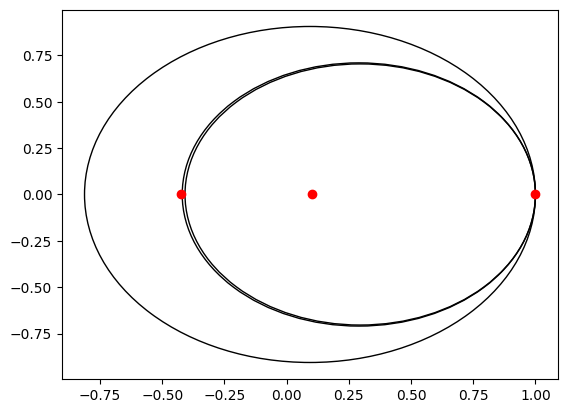

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for i in range(n):
    ax.add_patch(plt.Circle((A[i][i], 0), radius=1 - A[i][i], fill=False))
ev = np.linalg.eigvals(A)
plt.scatter(ev.real, ev.imag, color='red')

# Задача 2.  PageRank и степенные итерации.


Обычно вычисление собственных значений и собственных векторов необходимо для изучения
- вибраций в механических структурах
- снижения сложности моделей сложных систем

Более половины вычислительных мощностей в мире тратится на решение задач такого типа для задач.

Одна из самых известных задач о вычислении собственных векторов - задача о ранжировании $n$ веб-страниц (Google PageRank). Подход, который вам нужно будет реализовать в этой задаче, был одним из главных в работе Google на раннем этапе.

Всё, что мы собираемся использовать - структуру взаимных ссылок между страницами. PageRank определяется рекурсивно: важность $i$-й страницы определяется как среднее значение важностей всех страниц, которые ссылаются на $i$-ю. Обозначим важность $i$-й страницы $p_{i}$, тогда это определение может быть записано в виде линейной системы:
$$
p_{i}=\sum_{j} \frac{p_{j}}{L(j)} l_{i j}
$$
где $l_{i j}=1$ если $j$-я страница ссылается на $i$-ю (в противном случае $\left.l_{i j}=0\right)$, а $L(j)-$ количество исходящих ссылок со страницы $j$. Система может быть переписана в виде задачи на собственное значение:
$$
p=G p, \quad G_{i j}=\frac{l_{i j}}{L(j)}
$$
Если в графе есть 'подвешенные' узлы (все элементы какого-то столбца равны нулю), то весь столбед заполняется числом $1 / n$. Наконец, вводится параметр $0<\beta<1$ так что матрица $G$ заменяется на
$$
G \rightarrow \beta G+\frac{1-\beta}{n} e e^{T}
$$
где $e$ - вектор, состоящий из единиц. Обратите внимание, что задача свелась к нахождению собственного вектора $p$ матрицы $G$, отвечающего собственному значению $1 .$ Можно показать, что 1 - максимально возможное собственное значение матрицы $G .$
- Придумайте самостоятельно небольшой граф связности ( 10 узлов), постройте соответствуюшие матрицы $l$ и $G$ и найдите численно собственный вектор, отвечающий PageRank.



- Скачайте файл, в котором представлен ориентированный граф, узлы которого составляют страницы stanford.edu, а направленные рёбра - ссылки между ними (граф задан матрицей смежности $l$ ). Распакуйте архив и загрузите его:
- Найдите PageRank для матрицы из предыдущего пункта. Для этого реализуйте степенную итерацию для нахождения собственного вектора, отвечающего максимальному собственному значению $G .$ Возьмите $\beta=0.8$
- Итерируйте до тех пор, пока 1-норма изменения вектора-кандидата не станет меньше $10^{-4}$. Сколько итераций понадобилось?
- Какому собственному значению отвечает найденный вектор и у какого узла наибольший РаgеRапk?
- Докажите, что 1 - максимально возможное собственное значение матрицы G.

# Задача 3. Метод обратных итераций и итерации Рэлея.


Напишите программу для нахождения минимального по модулю собственного значения и соответствующего собственного вектора симметричной матрицы при использовании обратных итераций Рэлея. С её помощью решите задачу для
- матрицы Гильберта
- матрицы Лемера
- матрицы Паскаля
- для симметричной трёхдиагональной матрицы, где на главной диагонали стоят 2, а на боковых диагоналях -1.

Напишите на основе этой программы функцию, которая ищет ближайшее к заданному числу собственное значение.


Для перечисленных матриц вывести ответ для n = 2, 3, ... 10.

Матрицей Лемера называют матрицу, у которой элементы равны:

$a_{i j}=\frac{\min (i, j)}{\max (i, j)} $ (нумерация от 1)

Матрицей Паскаля называют матрицу, у которой элементы равны:

$S_{i j}=\left(\begin{array}{l}
n \\
r
\end{array}\right)=\frac{n !}{r !(n-r) !}, \quad n=i+j, \quad r=i$  (нумерация от 0)

Примечание. Для некоторых матриц можно использовать также выражение обратной матрицы в явном виде.

 Матрица, обратная к матрице Гильберта, может быть выражена в явном виде через биномиальные коэффициенты:

$$
\left(H^{-1}\right)_{i j}=(-1)^{i+j}(i+j-1)\left(\begin{array}{c}
n+i-1 \\
n-j
\end{array}\right)\left(\begin{array}{c}
n+j-1 \\
n-i
\end{array}\right)\left(\begin{array}{c}
i+j-2 \\
i-1
\end{array}\right)^{2}
$$

где $n$ - порядок матрицы. Таким образом, элементы обратной матрицы $H^{-1}-$ целые числа.  

In [3]:
import numpy as np
from scipy.special import comb

def max_eig(A, eps=None, n=None, x=None):
    if eps is None:
        eps = 1e-6
    if n is None:
        n = 100
    if x is None:
        x = np.zeros(A.shape[0])
        x[0] = 1
    Ax = A @ x
    l = np.dot(Ax, x)
    l0 = l
    x = Ax / np.linalg.norm(Ax)
    for i in range(n):
        Ax = A @ x
        l = np.dot(Ax, x)
        x = Ax / np.linalg.norm(Ax)
        if np.abs(l - l0) < eps:
            break
        l0 = l
    return l, x

for n in range(1, 10):
    ii = range(1, n + 1)
    H = np.array([[1 / (i + j - 1) for i in ii] for j in ii])
    Hinv = np.array([[
        (-1)**(i + j) * (i + j - 1) *
        comb(n + i - 1, n - j, exact=True) *
        comb(n + j - 1, n - i, exact=True) *
        comb(i + j - 2, i - 1, exact=True) ** 2
        for i in ii] for j in ii])
    S = np.array([[comb(i + j, i) for i in ii] for j in ii])
    Sinv = np.linalg.inv(S)
    L = np.array([[min(i, j) / max(i, j) for i in ii] for j in ii])
    o = np.ones(n)
    oo = -np.ones(n - 1)
    A = np.diag(o * 2) + np.diag(oo, -1) + np.diag(oo, 1)
    Ainv = np.linalg.inv(A)
    Linv = np.linalg.inv(L)
    Aeig = np.linalg.eigvals(A).min()
    Leig = np.linalg.eigvals(L).min()
    Seig = np.linalg.eigvals(S).min()
    Heig = np.linalg.eigvals(H).min()
    Lm = 1 / max_eig(Linv)[0]
    Am = 1 / max_eig(Ainv)[0]
    Sm = 1 / max_eig(Sinv)[0]
    Hm = 1 / max_eig(Hinv)[0]
    print(
        n, '\n',
        #Linv, Sinv, Hinv,
        Leig, Seig, Aeig, Heig, '\n',
        Lm, Sm, Am, Hm, '\n',
    )

1 
 1.0 2.0 2.0 1.0 
 1.0 2.0 2.0 1.0 

2 
 0.5000000000000001 0.3944487245360113 1.0 0.06574145408933513 
 0.5000000077435243 0.3944487245416179 1.0000000154870485 0.06574145410072667 

3 
 0.3020195672892079 0.08990642318252093 0.5857864376269049 0.0026873403557735338 
 0.3020195723235992 0.08990642318928325 0.5857864659621669 0.0026873403557761506 

4 
 0.20777548591801145 0.02149522400911286 0.3819660112501052 9.670230402258155e-05 
 0.20777549269774098 0.02149522400911142 0.38196602223896853 9.670230402258687e-05 

5 
 0.15601953644917255 0.005282690226328967 0.2679491924311222 3.287928772170568e-06 
 0.15601954038272856 0.005282690226326362 0.2679491928466166 3.2879287721718626e-06 

6 
 0.12400683125567913 0.001319694965844513 0.19806226419516107 1.0827994844739511e-07 
 0.12400683873934891 0.0013196949658530904 0.1980622644438539 1.0827994845655498e-07 

7 
 0.1024674888179524 0.00033284646252488865 0.1522409349774269 3.493898593442223e-09 
 0.10246749393227925 0.00033284646250

In [16]:
def nearest_eig(A, l):
    B = np.eye(A.shape[0]) * l + A
    return 1 / max_eig(np.linalg.inv(B))[0] 

def nearest(a, x):
    return a[np.abs(a - x).argmin()]

l = 12

for n in range(1, 10):
    ii = range(1, n + 1)
    H = np.array([[1 / (i + j - 1) for i in ii] for j in ii])
    Hinv = np.array([[
        (-1)**(i + j) * (i + j - 1) *
        comb(n + i - 1, n - j, exact=True) *
        comb(n + j - 1, n - i, exact=True) *
        comb(i + j - 2, i - 1, exact=True) ** 2
        for i in ii] for j in ii])
    S = np.array([[comb(i + j, i) for i in ii] for j in ii])
    Sinv = np.linalg.inv(S)
    L = np.array([[min(i, j) / max(i, j) for i in ii] for j in ii])
    o = np.ones(n)
    oo = -np.ones(n - 1)
    A = np.diag(o * 2) + np.diag(oo, -1) + np.diag(oo, 1)
    Ainv = np.linalg.inv(A)
    Linv = np.linalg.inv(L)
    print(
        n, '\n',
        nearest_eig(A, l), nearest_eig(H, l),
        nearest_eig(L, l), nearest_eig(S, l), 
        '\n',
        nearest(np.linalg.eigvals(A), l),
        nearest(np.linalg.eigvals(H), l),
        nearest(np.linalg.eigvals(L), l),
        nearest(np.linalg.eigvals(S), l),
    )

1 
 2.0 1.0 1.0 2.0 
 2.0 1.0 1.0 2.0
2 
 1.0000069534358929 0.06574686538312102 0.5000122600869807 0.39444948850466144 
 3.0 1.2675918792439982 1.5 0.3944487245360113
3 
 0.5857992998968422 0.003536013769793289 0.30205856793457775 0.08991115275072925 
 3.4142135623730914 1.408318927123654 2.0124455970858532 1.697288936710975
4 
 0.3819795160652024 0.0065511856013662495 0.20785349996938063 0.021520826921686886 
 2.618033988749894 1.5002142800592422 2.5361624744861992 5.234343191285363
5 
 0.26796372557079406 0.0104558379798112 0.1632500897384377 0.005394148890629946 
 2.999999999999998 1.56705069109823 3.066640395457876 1.5857190863863646
6 
 0.19808323670663963 0.01372385497961659 0.17131923247114633 0.016092916089887943 
 3.246979603717461 1.6188998589243382 3.6012115353017444 4.3852657691168515
7 
 0.15227444674679935 0.016158894683072855 0.16759845418121255 0.009686823328467487 
 2.7653668647301783 1.6608853389269302 4.138389412500489 1.524652595872889
8 
 0.1206503819302771 0.0175

# Задача 4.  PageRank с помощью библиотек на Python.

Мы можем вычислить PageRank с помощью библиотек на Python. Будем использовать бибилотеку networkx для работы с графами, она может быть установлена с помощью следующей команды

conda install networkx

Возьмём простой пример графа Zachary karate club. Этот граф был собран вручную в 1977, и является классическим графом для анализа соцсетей.
https://en.wikipedia.org/wiki/Zachary%27s_karate_club  

  

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
kn = nx.read_gml('graph.gml')
#nx.write_gml(kn, 'karate2.gml')
nx.draw_networkx(kn) #Draw the graph

Сейчас мы можем вычислить PageRank, используя функцию, встроенную в NetworkX. Мы также изобразим вершины графа пропорционально тому, наскольку они важны в смысле величины PageRank'a.

  

In [ ]:
pr = nx.algorithms.link_analysis.pagerank(kn)
pr_vector = list(pr.values())
pr_vector = np.array(pr_vector) * 3000
nx.draw_networkx(kn, node_size=pr_vector, labels=None)

Самостоятельно проделайте это всё для страниц stanford.edu

#Задача 5. Матрица вида диагональная матрица плюс матрица малого ранга.

- Собственные значения матрицы вида
$$
D+\rho u u^*
$$
вычислить не так просто!
- Характеристический многочлен имеет вид
$$
\operatorname{det}\left(D+\rho u u^*-\lambda I\right)=\operatorname{det}(D-\lambda I) \operatorname{det}\left(I+\rho(D-\lambda I)^{-1} u u^*\right)=0
$$
Тогда (докажите!!)
$$
\operatorname{det}\left(I+\rho(D-\lambda I)^{-1} u u^*\right)=1+\rho \sum_{i=1}^n \frac{\left|u_i\right|^2}{d_i-\lambda}=0
$$
Подсказка: найдите $\operatorname{det}\left(I+w u^*\right)$ используя два факта:
- $\operatorname{det}(C)=\prod_{i=1}^n \lambda_i(C)$
- $\operatorname{trace}(C)=\sum_{i=1}^n \lambda_i$.



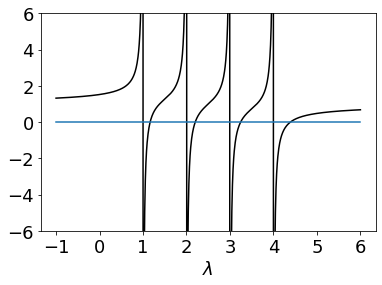

In [ ]:
import numpy as np

lm = [1, 2, 3, 4]
M = len(lm)
D = np.array(lm)
a = np.min(lm)
b = np.max(lm)
t = np.linspace(-1, 6, 1000)
u = 0.5 * np.ones(M)
rho = 1
def fun(lam):
    return 1 + rho * np.sum(u**2/(D - lam))
res = [fun(lam) for lam in t]
plt.plot(t, res, 'k')
plt.plot(t, np.zeros_like(t))
plt.ylim([-6, 6])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
_ = plt.xlabel("$\lambda$", fontsize=18)

Эта функция имеет только один корень на каждом отрезке $\left[d_i, d_{i+1}\right]$

Мы показали справедливость теоремы Коши о чередовании (что происходит с собственными числами после внесения возмущения ранга 1).

Сформулируйте самостоятельно и докажите эту теорему.

#Задача 6. Нелинейное характеристическое уравнение.

Решите нелинейное уравнение для $\lambda$

$$
1+\rho \sum_{i=1}^n \frac{\left|u_i\right|^2}{d_i-\lambda}=0
$$

Указания:

- Метод Ньютона не сработает (изобразите касательные к графику , можно использовать графики из прошлой задачи).
- Заметим, что метод Ньютона - это по сути линейная аппроксимация функции $f(\lambda)$ на каждой итерации.
- Лучше аппроксимировать с помощью гиперболы вида:
$$
f(\lambda) \approx c_0+\frac{c_1}{d_i-\lambda}+\frac{c_2}{d_{i+1}-\lambda}
$$
- Для вычисления коэффициентов нам нужно вычислить $f(\lambda)$ и $f^{\prime}(\lambda)$ в некоторых точках.
- После чего получить апроксимацию из решения квадратного уравнения

#Задача 7. Теорема Лёвнера (Charles Loewner).

##Докажите теорему Лёвнера.

**Важный недостаток метода "разделяй и властвуй"**

- Устойчивость: этот метод игнорировали долгое время из-за неустойчивого вычисления собственных векторов.
- Нам нужно вычислить собственные векторы матрицы $D+\rho u u^*$.
- Точное выражение для собственных векторов $v_i$, для которых найдены собственные значения $\alpha_i$ :
$$
\left(D+\rho u u^*\right) v_i=\alpha_i v_i \quad\left(D-\alpha_i I\right) v_i+\rho\left(u^* v_i\right) u=0
$$
То есть $v_i \in \operatorname{span}\left(\left\{\left(D-\alpha_i I\right)^{-1} u\right\}\right)$

**Причины неустойчивости:**
- если есть два близких собственных числа $\alpha_i$ и $\alpha_{i+1}$, то соответствующие векторы $\left(D-\alpha_i I\right)^{-1} u$ и $\left(D-\alpha_{i+1} I\right)^{-1} u$ будут близки, хотя долждны быть ортогональны
- если $\alpha_i$ и $\alpha_{i+1}$ очень близки, то они близки к числу $d_i$ между ними, то есть матрицы $D-\alpha_i I$ и $D-\alpha_{i+1} I$ близки к вырожденным

**Теорема Лёвнера (Charles Loewner)**

- Решение проблемы неустойчивости можно получить с помощью теоремы Лёвнера:


Если $\alpha_i$ и $d_i$ удовлетворяют теореме о чередовании
$$
d_n<\alpha_n<\ldots<d_{i+1}<\alpha_{i+1} \ldots
$$
Тогда существует вектор $\widehat{u}$ такой что $\alpha_i$ - точное собственное значение матрицы
$$
\widehat{D}=D+\widehat{u} \widehat{u}^*
$$
и
$$
\widehat{u}_i^2=\frac{\prod_{j=1}^n\left(\alpha_j-d_i\right)}{\prod_{j=1, j \neq i}^n\left(d_j-d_i\right)}
$$
- Использование вектора $\widehat{u}$ вместо $u$ даёт устойчивое вычисление собственного вектора!
- Таким образом, сначала вычисляются собственные значения, затем $\widehat{u}$ и только потом собственные векторы.

# Задача 8. Верхне-гессенберговая форма

Напишите функцию, которая решает СЛАУ методом отражений Хаусхолдера.
И вторую функцию, которая приводит матрицу к верхне-гессенберговой форме.

## Пример работы алгоритма.

Решим для примера систему уравнений "вручную" методом отражений.

Система уравнений:

$$
\left\{\begin{array}{l}
x_1+x_2-x_3=1 \\
x_1-2 x_2+x_3=3 \\
3 x_1+2 x_2+x_3=4
\end{array}\right.
$$

Расширенная матрица системы:

$A^{(0)}=\left|\begin{array}{lrrr}1.00000 & 1.00000 & -1.0000 & 1.0000 \\ 1.0000 & -2.0000 & 1.0000 & 3.0000 \\ 3.0000 & 2.0000 & 1.0000 & 4.0000\end{array}\right|$
Шar $1, k=1$
$$
\begin{aligned}
&s=\left|\begin{array}{l}
1.0000 \\
1.0000 \\
3.0000
\end{array}\right|, \quad h=\left|\begin{array}{l}
1.0000 \\
0.0000 \\
0.0000
\end{array}\right| \\
&d=\sum_{i=1}^3 s_i^2=1^2+1^2+3^2=11, \quad b=\operatorname{sign}\left(a_{1,1}^{(0)}\right) \sqrt{d}=3.3166, \quad p=\sqrt{2(11+3.3166 \cdot 1.0000)}=5.3510
\end{aligned}
$$


\begin{aligned}
&w=\frac{1}{p}(s+b h)=\frac{1}{5.3510} \cdot\left(\left|\begin{array}{c}
1.0000 \\
1.0000 \\
3.0000
\end{array}\right|+3.3166 \cdot\left|\begin{array}{l}
1.0000 \\
0.0000 \\
0.0000
\end{array}\right|\right)=\left|\begin{array}{l}
0.8067 \\
0.1869 \\
0.5606
\end{array}\right| \\
&
\end{aligned}




\begin{aligned}
&U=E-2 w w^T=\left|\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{array}\right|-2 \cdot\left|\begin{array}{ll}
0.8067 \\
0.1869 \\
0.5606
\end{array}\right| \cdot|0.80670 .1869 \quad 0.5606|=\left|\begin{array}{rrr}
-0.3015 & -0.3015 & -0.9045 \\
-0.3015 & 0.9302 & -0.209 \\
-0.9045 & -0.2095 & 0.3714
\end{array}\right|, \\
&
\end{aligned}

$$A^{(1)}=U^{(1)} \cdot A^{(0)}=\left|\begin{array}{rrrr}
-0.3015 & -0.3015 & -0.9045 \\
-0.3015 & 0.9302 & -0.2095 \\
-0.9045 & -0.2095 & 0.3714
\end{array}\right| \cdot\left|\begin{array}{rrrr}
1.0000 & 1.00000 & -1.00000 & 1.0000 \\
1.0000 & -2.0000 & 1.0000 & 3.0000 \\
3.0000 & 2.0000  & 1.0000 & 4.0000
\end{array}\right|
=\left|\begin{array}{rrrr}
-3.3166 & -1.5076 & -0.9045 & -4.8242 \\
0.0000 & -2.5809 & 1.0221 & 1.6508 \\
0.0000 & 0.2573 & 1.0663 & -0.0477
\end{array}\right|$$



Шаг $2, k=2$
$$
\begin{aligned}
&s=\left|\begin{array}{r}
0.0000 \\
-2.5809 \\
0.2573
\end{array}\right|, h=\left|\begin{array}{l}
0.0000 \\
1.00000 \\
0.0000
\end{array}\right|, \\
&d=(-2.5809)^2+(0.2573)^2=6.7273, \quad b=\operatorname{sign}\left(a_{2,2}^{(1)}\right) \sqrt{d}=-2.5937, \\
&p=5.1810, w=\frac{1}{5.1810} \cdot\left(\left|\begin{array}{r}
0.0000 \\
-2.5809 \\
0.2573
\end{array}\right|-2.5937 \cdot\left|\begin{array}{l}
0.0000 \\
1.0000 \\
0.0000
\end{array}\right|\right)=\left|\begin{array}{r}
0.0000 \\
-0.9988 \\
0.0497
\end{array}\right|,
\end{aligned}
$$

$$U=\left|\begin{array}{lll}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{array}\right|-2 \cdot\left|\begin{array}{rrr}
0.0000 \\
-0.9988 \\
0.0497
\end{array}\right| \cdot|0.0000-0.99880 .0497|=\left|\begin{array}{rrr}
1.0000 & 0.0000 & -0.0000 \\
0.0000 & -0.9951 & 0.0992 \\
-0.0000 & 0.0992 & 0.9951
\end{array}\right| \text {, } $$

$$A^{(2)}=U^{(2)} \cdot A^{(1)}=  \left|\begin{array}{rrrr}
-3.3166 & -1.5076 & -0.9045 & -4.8242 \\
-0.0000 & 2.5937 & -0.9113 & -1.6473 \\
0.0000 & 0.0000 & 1.1625 & 0.1162
\end{array}\right|$$

По полученной расширенной матрице А ${ }^{(2)}$ запишем систему уравнений, эквивалентную исходной системе:
$$
\left\{\begin{array}{l}
-3.3166 \cdot x_1-1.5076 \cdot x_2-0.9045 \cdot x_3=-4.8242 \\
2.5937 \cdot x_2-0.9113 \cdot x_3=-1.6473 \\
1.1625 \cdot x_3=0.1162
\end{array}\right.
$$

из третьего уравнения находим $x_3$, подставляем его во второе уравнение, находим $x_2$, подставляем х ${ }_2$ и х в первое уравнение, и находим $x_1$. Получим
$$
x_1=1.7, x_2=-0.6, x_3=0.1
$$
по ссылке (формальный параметр с префиксом var).